In [1]:
#Voltage and Frequency Regulation
import pandas as pd
pd.set_option('display.max_rows', None)  # Show all rows for variable understanding
pd.set_option('display.max_columns', None)  # Show all columns for variable understanding

#Specifinge path to CSV file
file_path = '/Users/katerinadenyakina/Desktop/Individual Project/df_merged.csv'

df_merged = pd.read_csv(file_path)

df_mergedColumnAnalysis = pd.DataFrame({"columns": df_merged.columns,
                                 "data Type": df_merged.dtypes.values,
                                 "Total Count": df_merged.count().values,
                                 "Unique Count": df_merged.nunique().values
                                })
df_mergedColumnAnalysis

,columns,data Type,Total Count,Unique Count
0,Turbine_ID,float64,125277,4
1,Timestamp,object,125277,33461
2,Gen_RPM_Max,float64,125277,9368
3,Gen_RPM_Min,float64,125277,8734
4,Gen_RPM_Avg,float64,125277,12981
5,Gen_RPM_Std,float64,125277,4707
6,Gen_Bear_Temp_Avg,float64,125277,76
7,Gen_Phase1_Temp_Avg,float64,125277,127
8,Gen_Phase2_Temp_Avg,float64,125277,120
9,Gen_Phase3_Temp_Avg,float64,125277,118


In [2]:
#Convert the 'Timestamp' column to datetime format
df_merged['Timestamp'] = pd.to_datetime(df_merged['Timestamp'])

#Converting 'Timestamp' column as it is  time-series data to use in ML
df_merged['month'] = df_merged['Timestamp'].dt.month
df_merged['day'] = df_merged['Timestamp'].dt.day
df_merged['hour'] = df_merged['Timestamp'].dt.hour
df_merged['minute'] = df_merged['Timestamp'].dt.minute
df_merged['second'] = df_merged['Timestamp'].dt.second

In [3]:
#Drop the 'Timestamp' column
df_merged.drop('Timestamp', axis=1, inplace=True)

/Users/katerinadenyakina/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


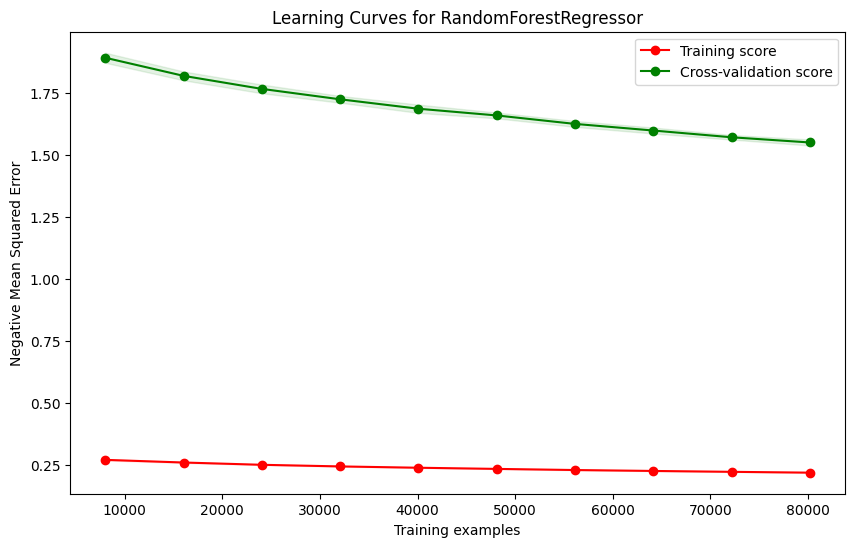

In [4]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, learning_curve, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#Target variables for prediction
target_columns = ['Grd_Prod_VoltPhse1_Avg', 'Grd_Prod_VoltPhse2_Avg', 'Grd_Prod_VoltPhse3_Avg']

features = df_merged.drop(columns=target_columns)

targets = df_merged[target_columns]

#Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

#Initialising the RandomForest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

#Cross-validation method
cv = KFold(n_splits=5, shuffle=True, random_state=42)

#Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf_regressor, X=X_train, y=y_train, 
    cv=cv, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error', n_jobs=-1)

#Calculate mean and standard deviation for training set scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for test set scores
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plotting learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.title("Learning Curves for RandomForestRegressor")
plt.xlabel("Training examples")
plt.ylabel("Negative Mean Squared Error")
plt.legend(loc="best")
plt.show()


/Users/katerinadenyakina/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.689e+04, tolerance: 2.411e+01
  model = cd_fast.enet_coordinate_descent(
/Users/katerinadenyakina/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.605e+04, tolerance: 2.964e+01
  model = cd_fast.enet_coordinate_descent(
/Users/katerinadenyakina/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

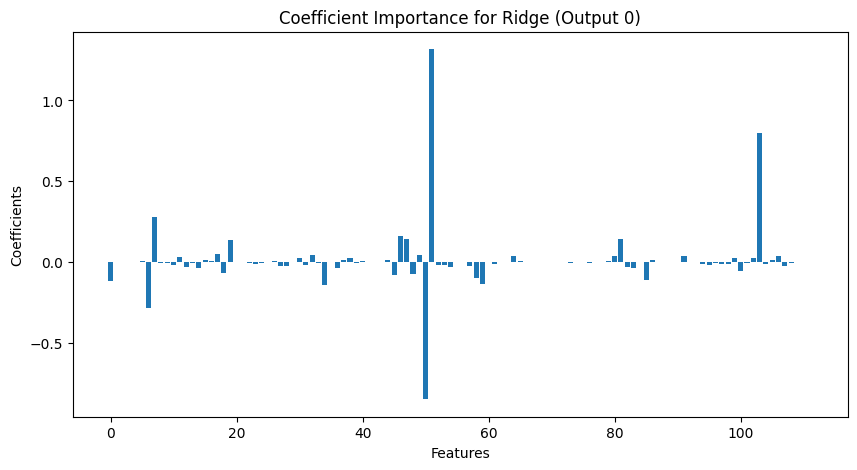

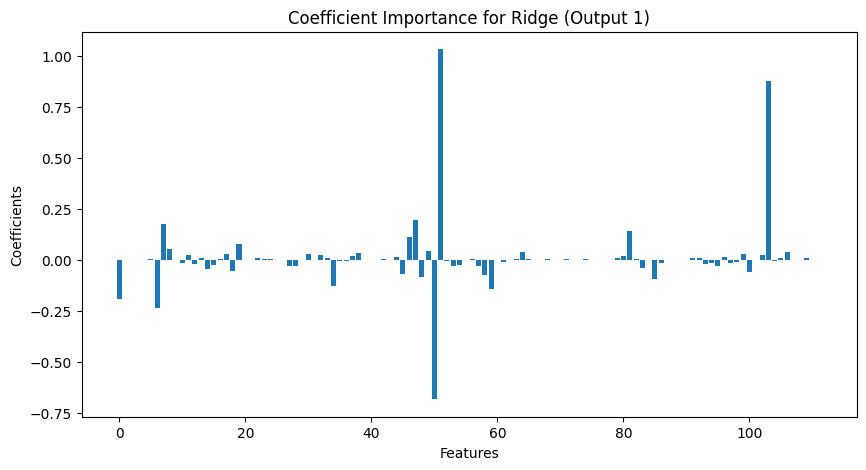

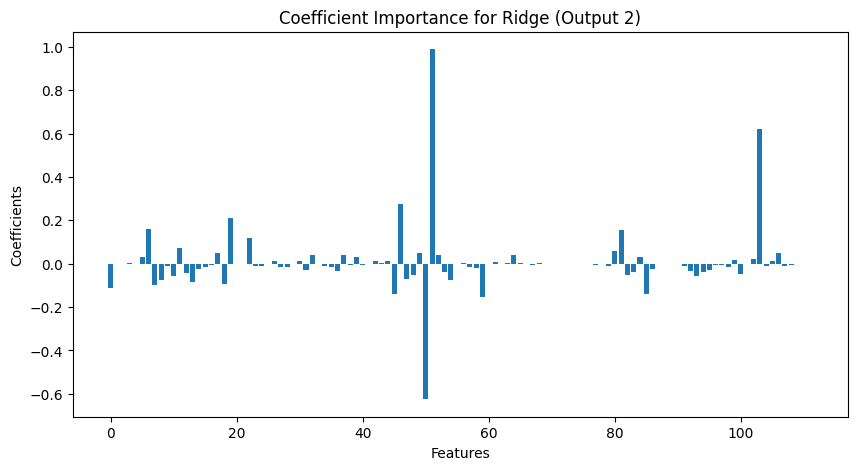

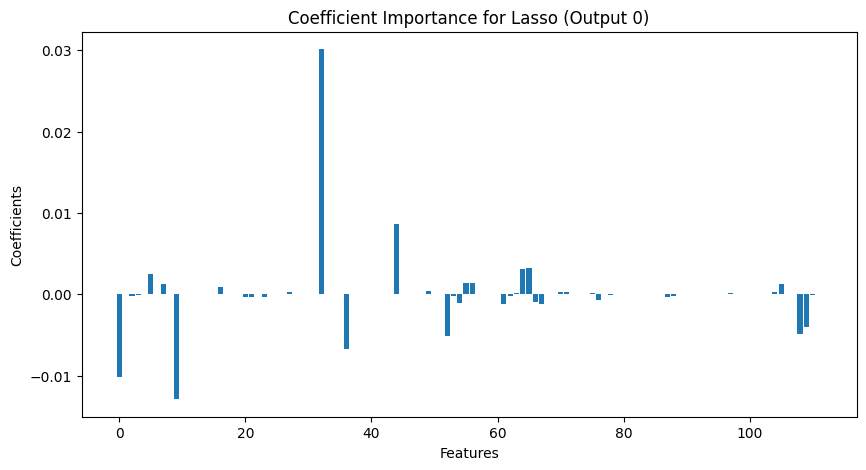

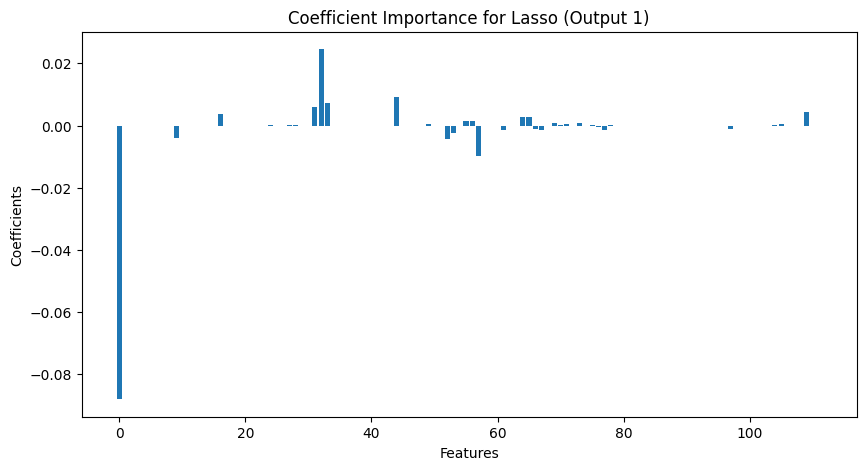

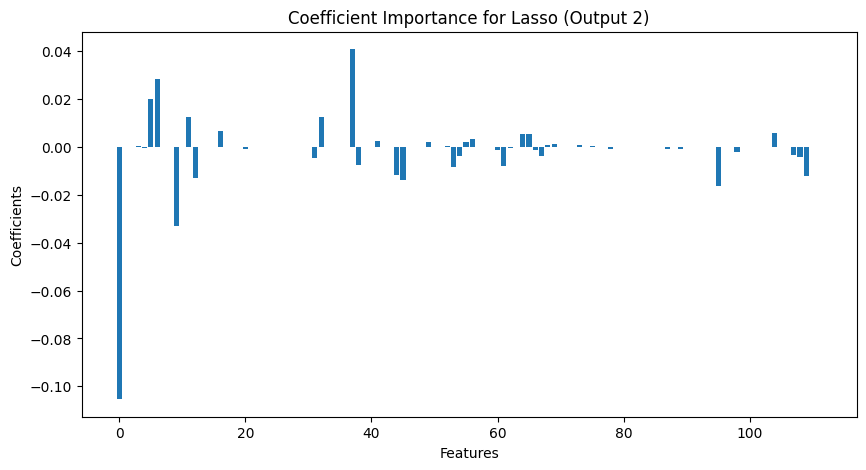

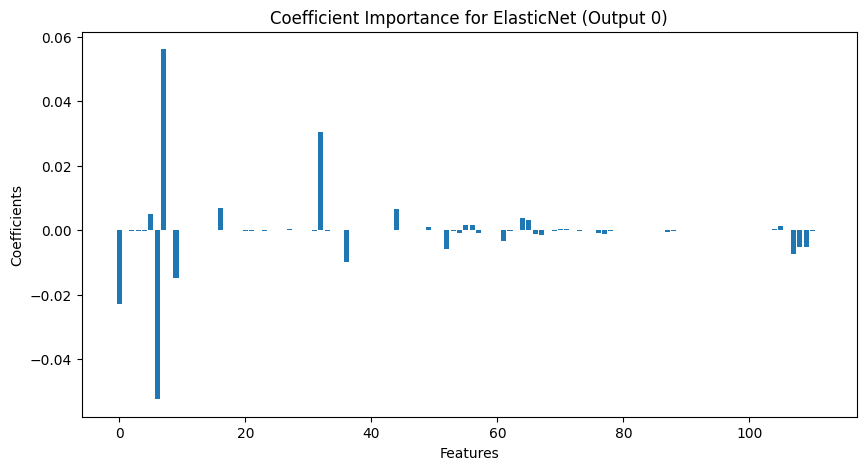

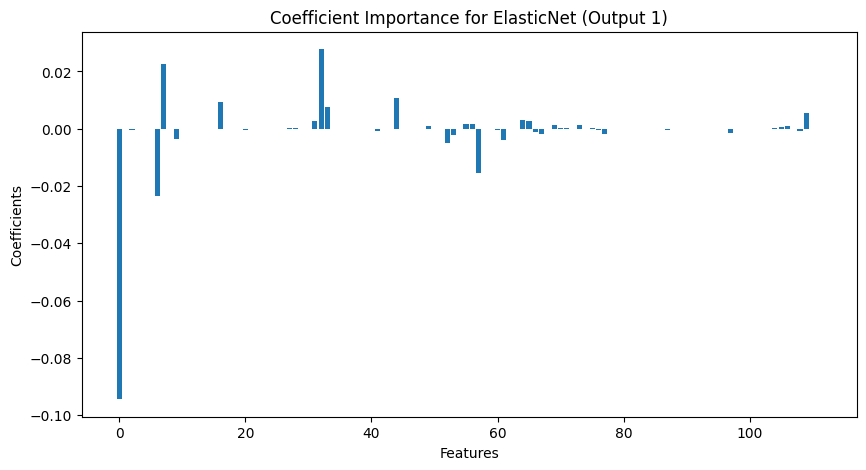

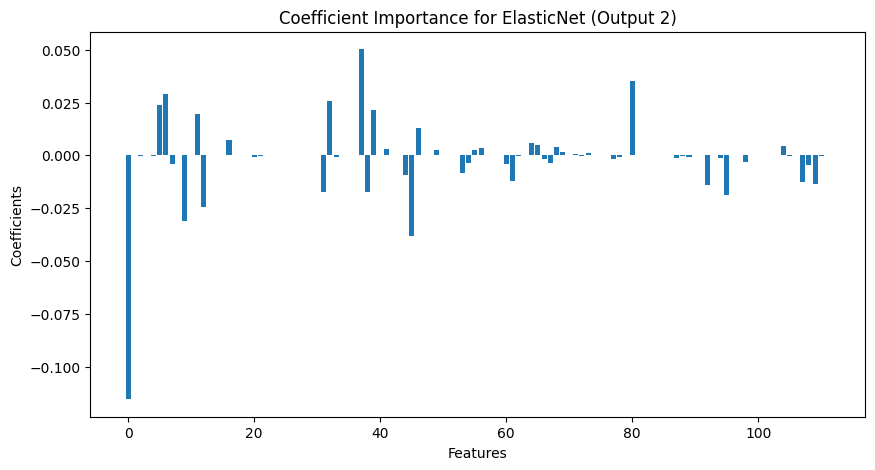

Ridge Regression - MSE: 1.83, R2: 0.41
Lasso Regression - MSE: 2.04, R2: 0.35
ElasticNet Regression - MSE: 2.03, R2: 0.35


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

#Target and features
target_columns = ['Grd_Prod_VoltPhse1_Avg', 'Grd_Prod_VoltPhse2_Avg', 'Grd_Prod_VoltPhse3_Avg']
features = df_merged.drop(columns=target_columns)
targets = df_merged[target_columns]

#Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

#Dictionary to store models
models = {
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'ElasticNet': ElasticNet(alpha=0.1, l1_ratio=0.5)
}

#Train each model and store results
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    #Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    #Store results
    results[name] = {
        'model': model,
        'mse': mse,
        'r2': r2
    }


#Plotting perfomance results
for name, result in results.items():
    model = result['model']
    
    #After training the coefficients is a 2D array becouse the target is multi-output
    coefs = model.coef_
    if len(coefs.shape) == 2: 
        n_output, n_features = coefs.shape
        for output in range(n_output):
            plt.figure(figsize=(10, 5))
            plt.bar(range(n_features), coefs[output, :])
            plt.xlabel('Features')
            plt.ylabel('Coefficients')
            plt.title(f'Coefficient Importance for {name} (Output {output})')
            plt.show()
    else:
        plt.figure(figsize=(10, 5))
        plt.bar(range(len(coefs)), coefs)
        plt.xlabel('Features')
        plt.ylabel('Coefficients')
        plt.title(f'Coefficient Importance for {name}')
        plt.show()

# Display the performance
for name, result in results.items():
    print(f'{name} Regression - MSE: {result["mse"]:.2f}, R2: {result["r2"]:.2f}')


Target: Grd_Prod_VoltPhse1_Avg
Mean Squared Error: 1.7508681466113867
R-squared Score: 0.268474414764887

Target: Grd_Prod_VoltPhse2_Avg
Mean Squared Error: 1.7577421707764191
R-squared Score: 0.4061807462453174

Target: Grd_Prod_VoltPhse3_Avg
Mean Squared Error: 2.0158829745742795
R-squared Score: 0.5455932909552734



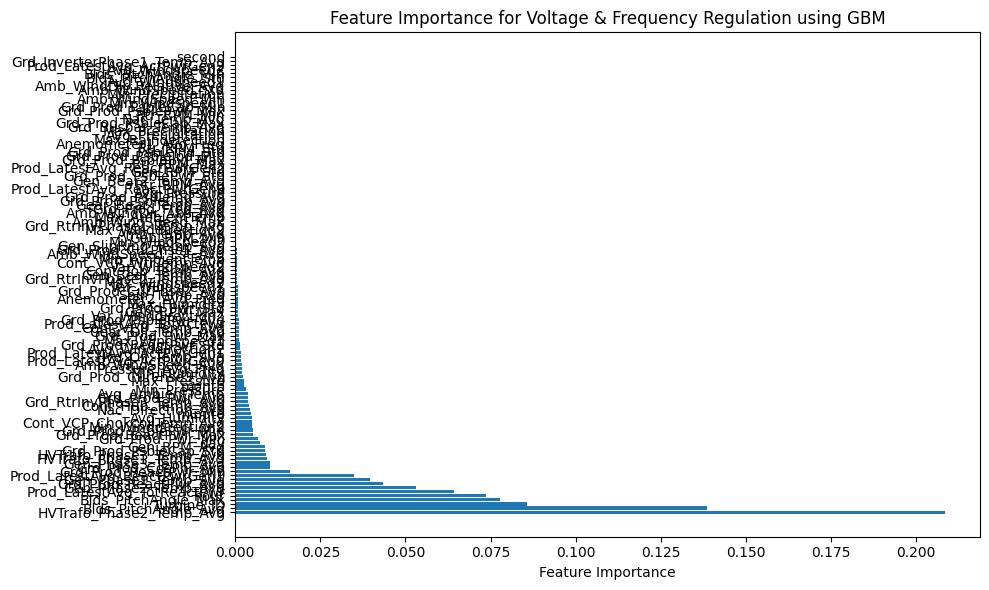

In [5]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, learning_curve, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

#Target and features
target_columns = ['Grd_Prod_VoltPhse1_Avg', 'Grd_Prod_VoltPhse2_Avg', 'Grd_Prod_VoltPhse3_Avg']
features = df_merged.drop(columns=target_columns)
targets = df_merged[target_columns]

#Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

#Dictionary to store models
models = {}
mse_scores = {}
r2_scores = {}

#Iterate over each target column to create and train a separate model
for target in target_columns:
    y_train_target = y_train[target]
    y_test_target = y_test[target]

    #Initialising the GBM Regressor
    gbm_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

    gbm_regressor.fit(X_train, y_train_target)

    y_pred = gbm_regressor.predict(X_test)

    #Calculate and print the Mean Squared Error and R-squared score
    mse = mean_squared_error(y_test_target, y_pred)
    r2 = r2_score(y_test_target, y_pred)
    mse_scores[target] = mse
    r2_scores[target] = r2

    #Store the model
    models[target] = gbm_regressor

    print(f'Target: {target}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared Score: {r2}\n')

#Plotting feature importances for 
feature_importances = models[target_columns[0]].feature_importances_
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features.columns[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title(f'Feature Importance for Voltage & Frequency Regulation using GBM')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()
 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

#Target variables for prediction
target_columns = ['Grd_Prod_VoltPhse1_Avg', 'Grd_Prod_VoltPhse2_Avg', 'Grd_Prod_VoltPhse3_Avg']

features = df_merged.drop(columns=target_columns)

targets = df_merged[target_columns]

#Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

#Standardising the features
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

#Standardising the targets 
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

#Building the Neural Network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_train_scaled.shape[1])
])

model.compile(optimizer=Adam(), loss='mse')

#Training the model
history = model.fit(X_train_scaled, y_train_scaled, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

y_pred_scaled = model.predict(X_test_scaled)

#Inverse transform to get actual values
y_pred = scaler_y.inverse_transform(y_pred_scaled)

#Calculate MSE and R-squared for evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

#Extracting the history of training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

#Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#Calculate R-squared post training score
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)
r2 = r2_score(y_test, y_pred)

#Plot for R2 score
plt.figure(figsize=(6, 4))
plt.bar(['R-squared'], [r2])
plt.title('R-squared Score on Test Data')
plt.ylabel('R-squared Value')
plt.ylim([0, 1])
plt.show()


Epoch 1/100


/Users/katerinadenyakina/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2506/2506 ━━━━━━━━━━━━━━━━━━━━ 2s 495us/step - loss: 0.6806 - val_loss: 0.6163
Epoch 2/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - loss: 0.6094 - val_loss: 0.6071
Epoch 3/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step - loss: 0.5992 - val_loss: 0.6071
Epoch 4/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 1s 427us/step - loss: 0.5880 - val_loss: 0.5917
Epoch 5/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 1s 427us/step - loss: 0.5797 - val_loss: 0.5892
Epoch 6/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - loss: 0.5774 - val_loss: 0.5879
Epoch 7/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 1s 454us/step - loss: 0.5622 - val_loss: 0.5879
Epoch 8/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step - loss: 0.5610 - val_loss: 0.5733
Epoch 9/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step - loss: 0.5550 - val_loss: 0.5738
Epoch 10/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 1s 429us/step - loss: 0.5432 - val_loss: 0.5762
Epoch 11/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 1s 440us/step - loss: 0.5420 - val_loss: 0.5718
Epoch 12/

2506/2506 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step - loss: 0.3900 - val_loss: 0.5540
Epoch 67/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 1s 457us/step - loss: 0.3876 - val_loss: 0.5520
Epoch 68/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 1s 424us/step - loss: 0.3845 - val_loss: 0.5484
Epoch 69/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - loss: 0.3832 - val_loss: 0.5599
Epoch 70/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 1s 471us/step - loss: 0.3842 - val_loss: 0.5519
Epoch 71/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 1s 425us/step - loss: 0.3818 - val_loss: 0.5696
Epoch 72/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 1s 432us/step - loss: 0.3802 - val_loss: 0.5454
Epoch 73/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - loss: 0.3816 - val_loss: 0.5437
Epoch 74/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 1s 501us/step - loss: 0.3785 - val_loss: 0.5541
Epoch 75/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step - loss: 0.3799 - val_loss: 0.5462
Epoch 76/100
2506/2506 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - loss: 0.3761 - val_loss: 0.5496
E

NameError: name 'mean_squared_error' is not defined

Epoch 1/20


/Users/katerinadenyakina/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0079 - val_loss: 0.0048
Epoch 2/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 3/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0043 - val_loss: 0.0046
Epoch 4/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 5/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 6/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 7/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 8/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0042 - val_loss: 0.0044
Epoch 9/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 10/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 11/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 12/20
1200/1200 ━━━━━━━━━━━━━━━━━━━

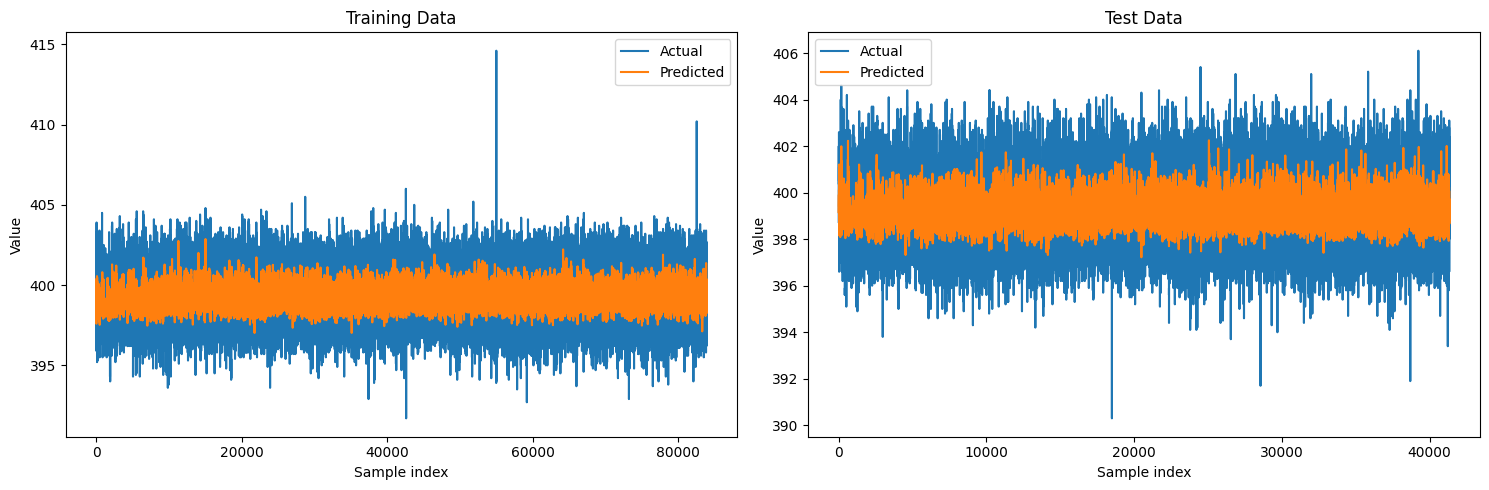

In [20]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

#Target columns and features
target_columns = ['Grd_Prod_VoltPhse1_Avg', 'Grd_Prod_VoltPhse2_Avg', 'Grd_Prod_VoltPhse3_Avg']
features = df_merged.drop(columns=target_columns)
targets = df_merged[target_columns]

#Normalise features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(df_merged.drop(columns=target_columns))
scaled_targets = scaler.fit_transform(df_merged[target_columns])

#Create a dataset for LSTM
def create_lstm_dataset(data, targets, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps - 1):
        a = data[i:(i + time_steps), :]
        X.append(a)
        y.append(targets[i + time_steps, :])
    return np.array(X), np.array(y)

time_steps = 5  # number of time steps
X, y = create_lstm_dataset(scaled_features, scaled_targets, time_steps)

#Train and test sets
train_size = int(len(X) * 0.67)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#Samples, time steps, features
X_train = np.reshape(X_train, (X_train.shape[0], time_steps, X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], time_steps, X_test.shape[2]))

#Build the LSTM network model
model = Sequential()
model.add(LSTM(50, input_shape=(time_steps, X_train.shape[2])))
model.add(Dense(3))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=20, batch_size=70, verbose=1, validation_data=(X_test, y_test))

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

#Inverse transform predictions and targets to unscale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test)

# Calculate RMSE 
train_score = np.sqrt(mean_squared_error(y_train[:,0], train_predict[:,0]))
test_score = np.sqrt(mean_squared_error(y_test[:,0], test_predict[:,0]))

from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

#Calculate R2 score
r2_train = r2_score(y_train, train_predict)
r2_test = r2_score(y_test, test_predict)

#Print R2 scores
print(f"Train R2 Score: {r2_train}")
print(f"Test R2 Score: {r2_test}")

#Plotting the first dimension of predictions 
plt.figure(figsize=(15, 5))

#Plot for training predictions
plt.subplot(1, 2, 1)
plt.plot(y_train[:, 0], label='Actual')
plt.plot(train_predict[:, 0], label='Predicted')
plt.title('Training Data')
plt.xlabel('Sample index')
plt.ylabel('Value')
plt.legend()

#Plot for test predictions
plt.subplot(1, 2, 2)
plt.plot(y_test[:, 0], label='Actual')
plt.plot(test_predict[:, 0], label='Predicted')
plt.title('Test Data')
plt.xlabel('Sample index')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()